In [2]:
import torch
import torch.optim.lr_scheduler as lr_scheduler
import numpy as np
from models.LSTM_GC import *
from utils.graph_creator import *
from torch_geometric.loader import DataLoader
from utils.utils import *
from utils.errors import *

In [7]:
model = TemporalGraphNetwork(input_dim=3, hidden_dim=20, output_dim=9, num_layers=2)

In [8]:
graphs = corr_graph('data/Belyy2017_GHG_zscore.csv', temporal=True, temporal_window=3, window_size=24, threshold=0.2)

Processing:   0%|          | 0/3177 [00:00<?, ?it/s]

In [9]:
def collate_fn(batch):
    # В данном случае batch - это список списков графов
    batched_graphs = []
    for graphs in batch:
        batched_graphs.append(graphs)
    return batched_graphs

train  = DataLoader(graphs[:int(len(graphs) * 0.7)], batch_size=64, shuffle=True, collate_fn=collate_fn)
test = DataLoader(graphs[int(len(graphs) * 0.7):], batch_size=64, shuffle=False, collate_fn=collate_fn)

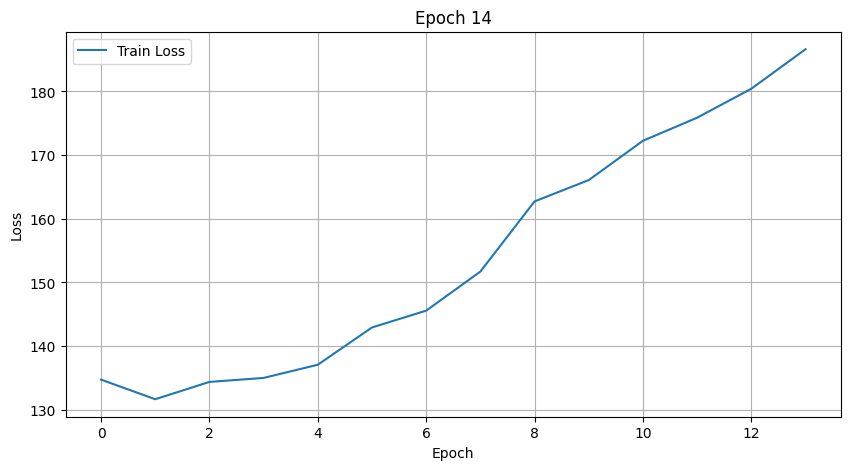

KeyboardInterrupt: 

In [10]:
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4, weight_decay=1e-5)
criterion = torch.nn.L1Loss()
# scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

# Обучение модели
model.train()
num_epochs = 1000
loss_list = []

for epoch in range(num_epochs):
    total_loss = 0
    total_mape = 0
    for data in train:
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, torch.tensor(data[0].y).float())
        mape = mape_loss(out, torch.tensor(data[0].y).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_mape += mape.item()
    loss_list.append(total_mape / len(train))
    update_plot(epoch, loss_list)
    # scheduler.step(total_loss)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}, Loss: {total_loss / len(train):.4f}')
        


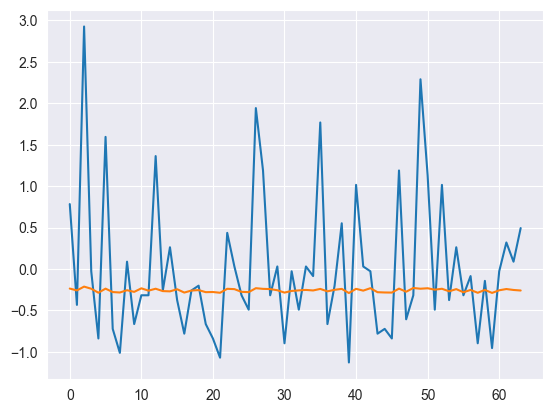

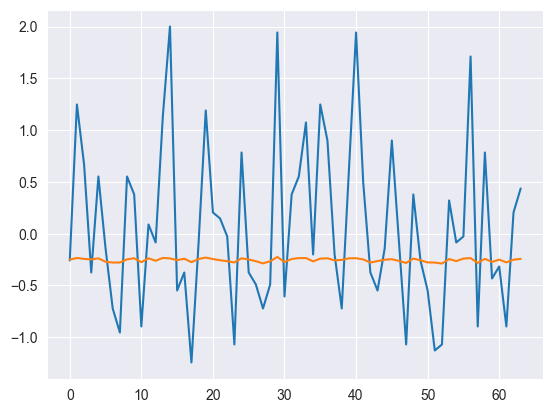

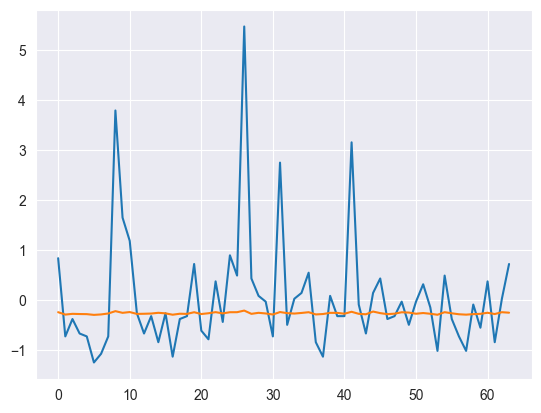

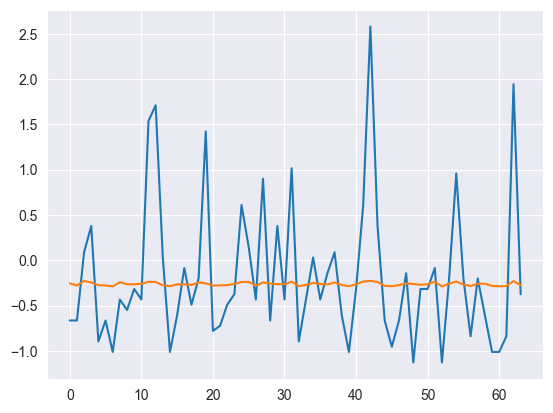

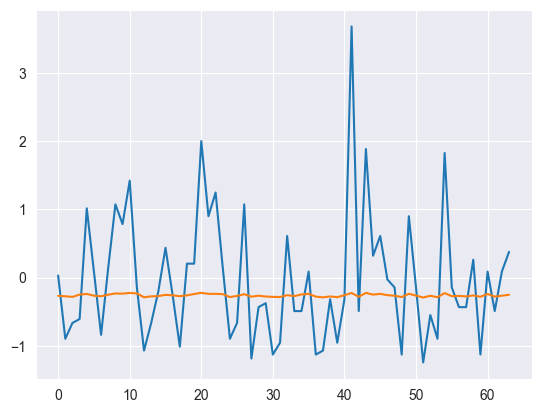

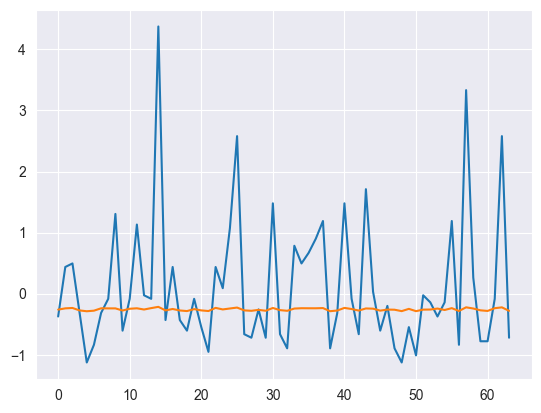

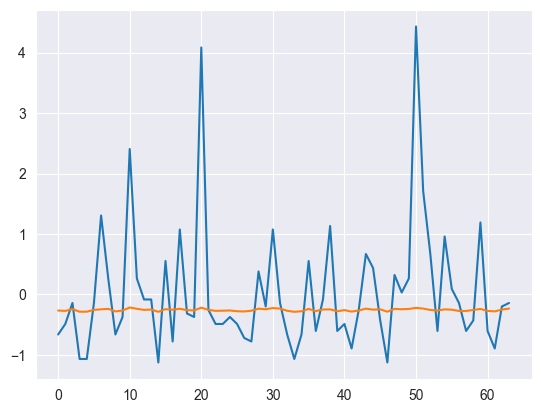

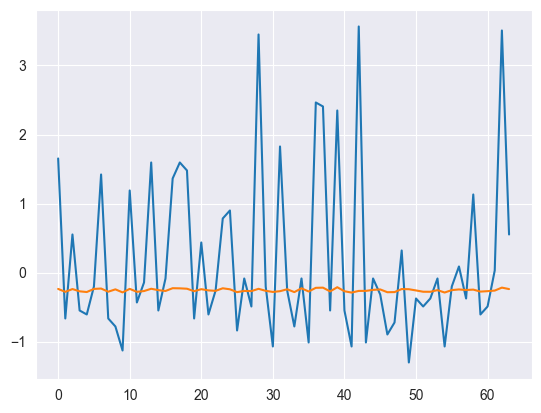

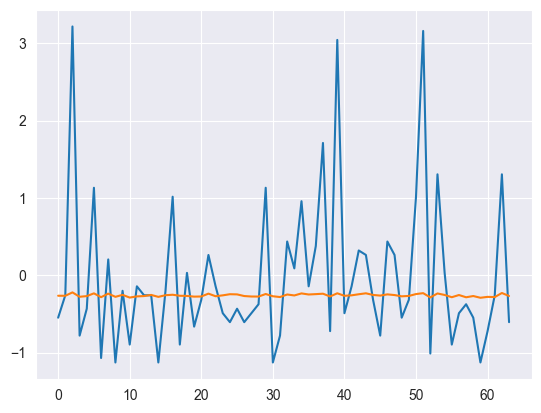

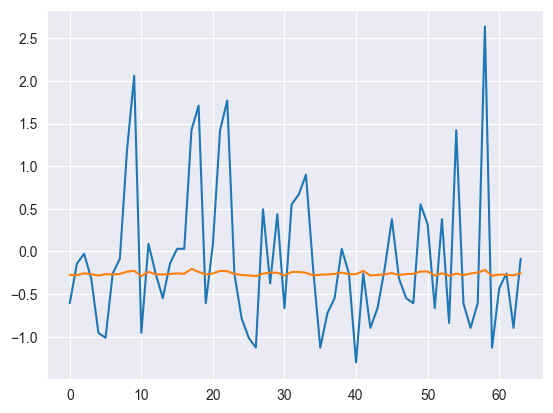

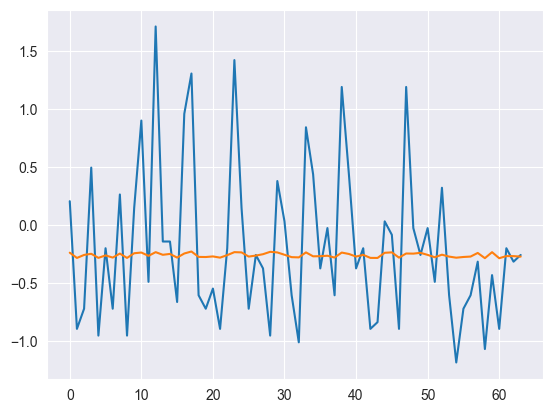

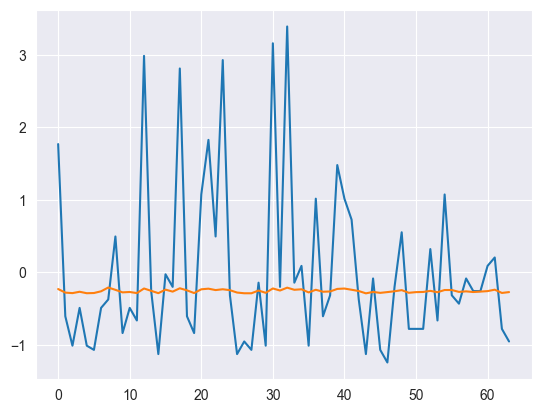

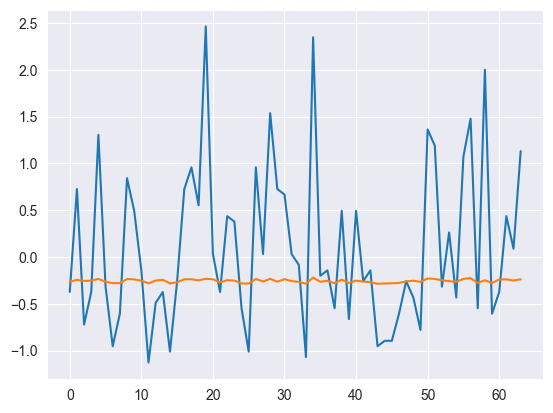

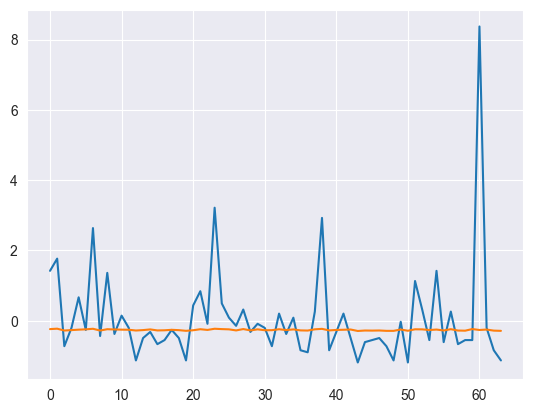

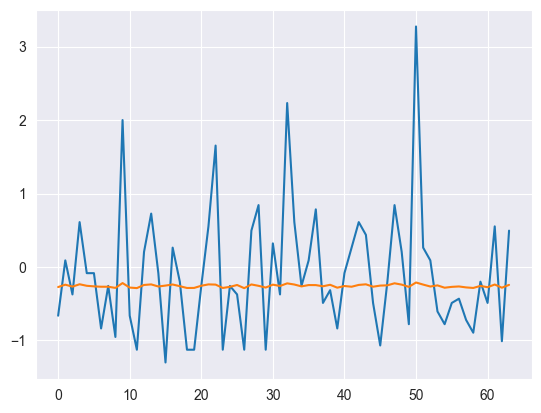

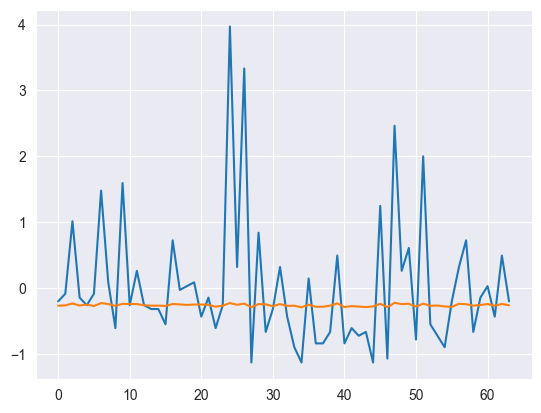

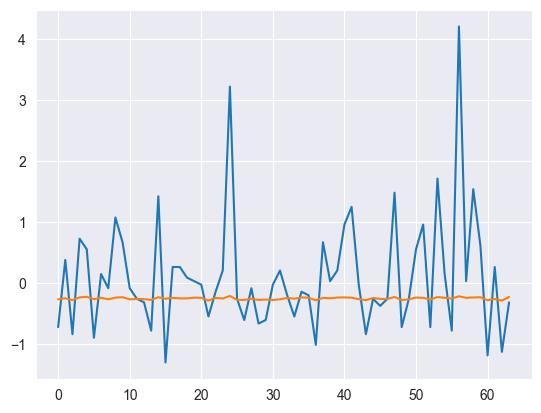

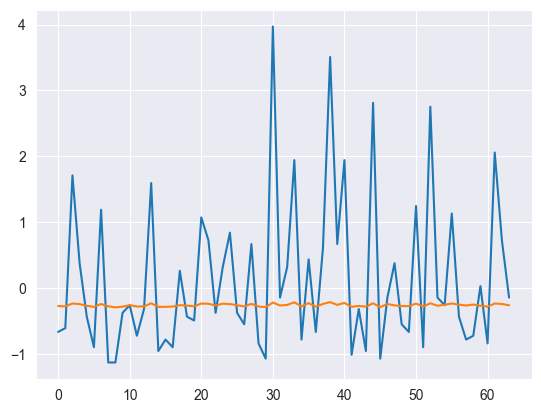

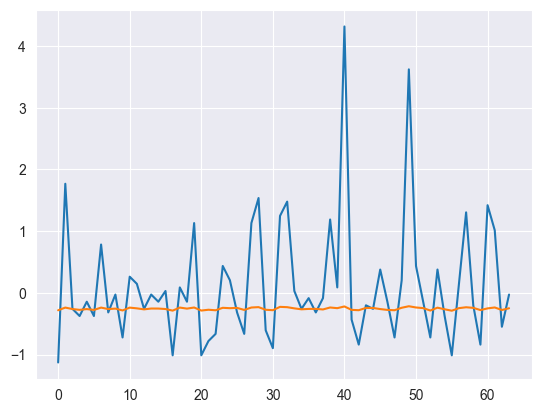

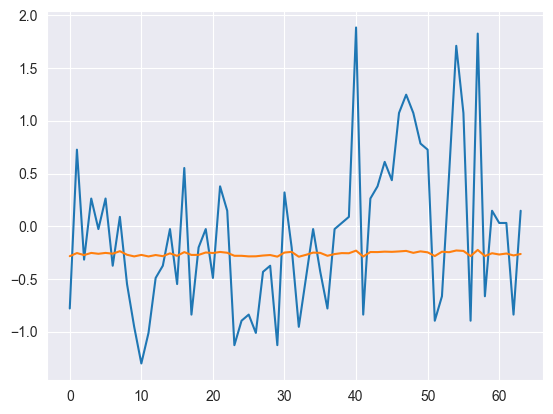

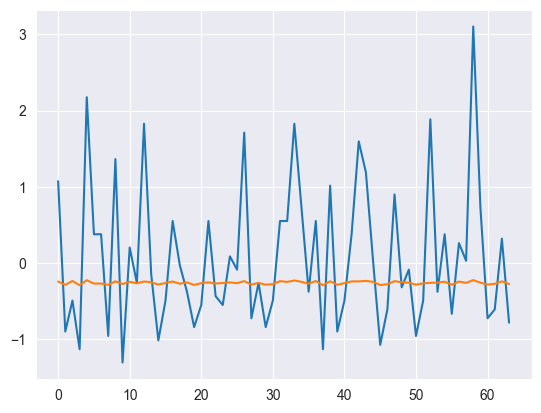

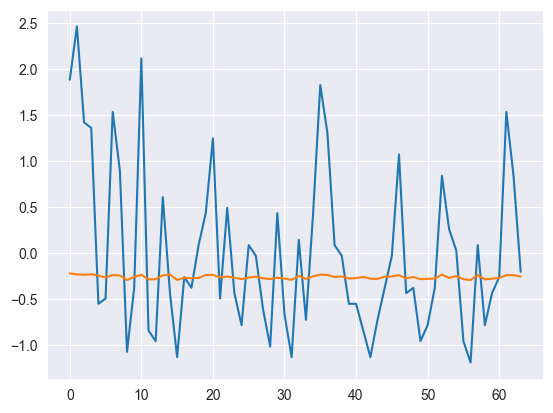

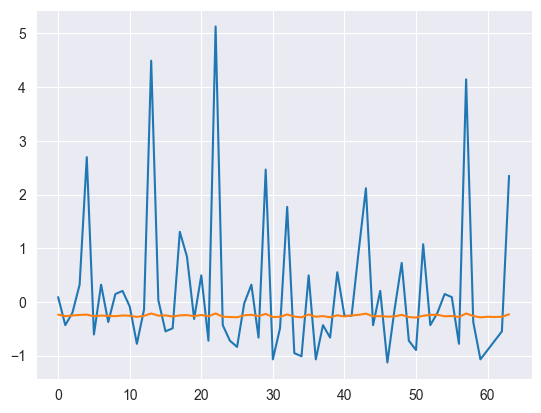

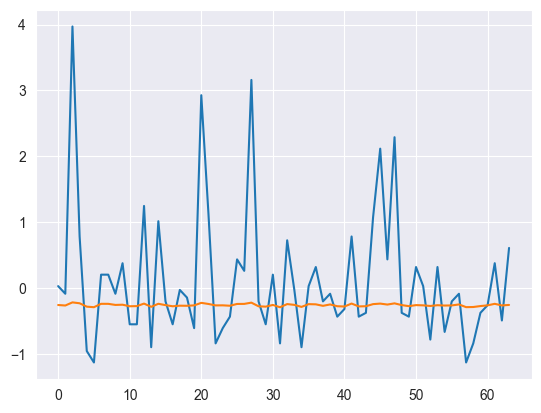

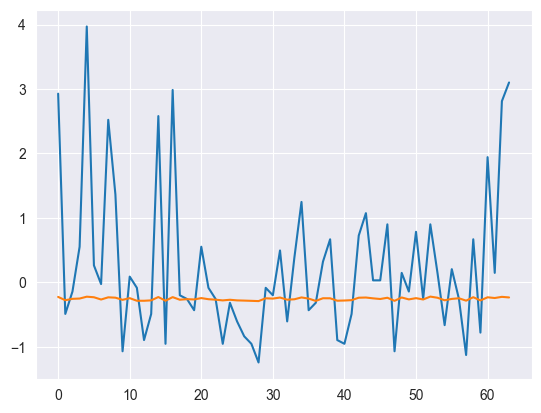

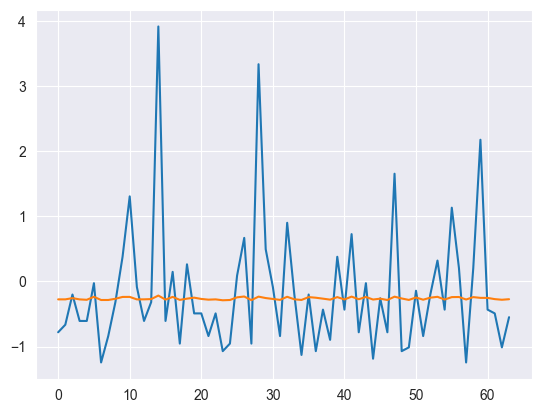

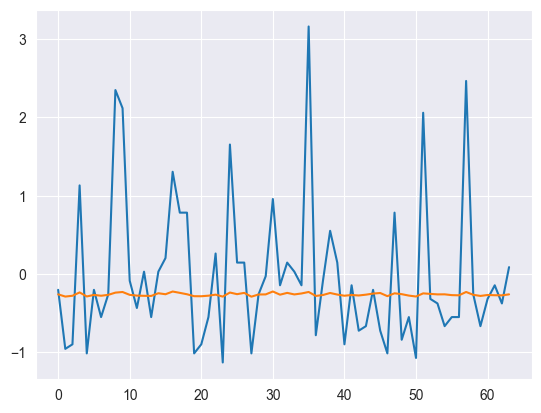

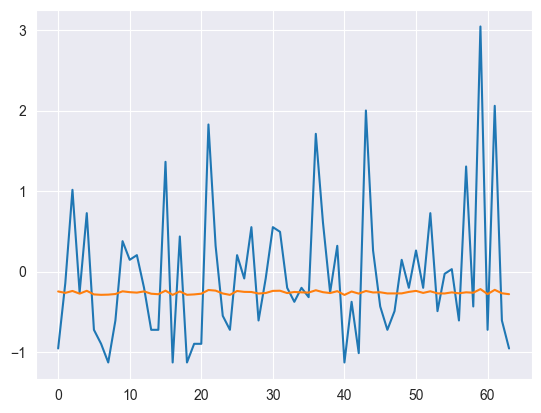

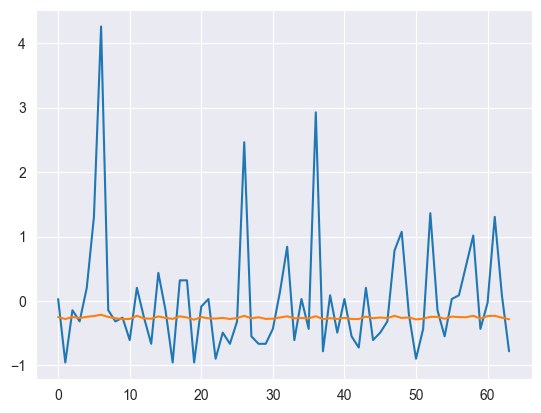

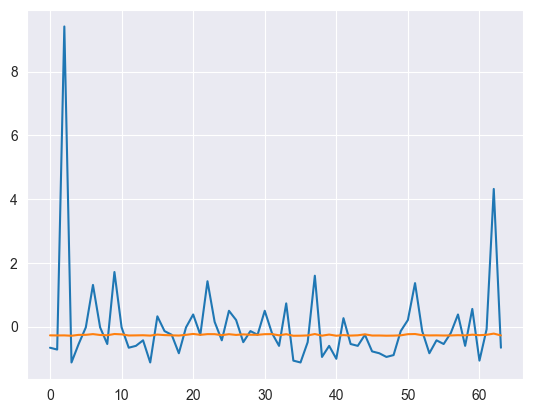

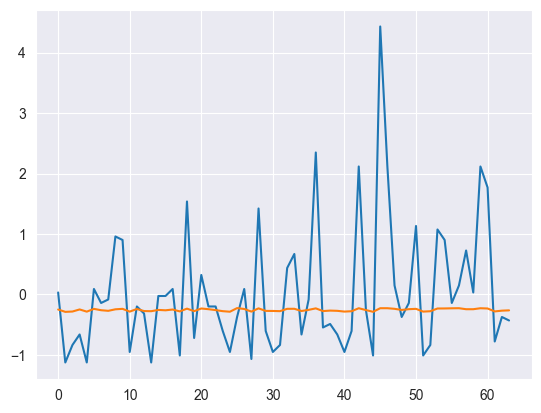

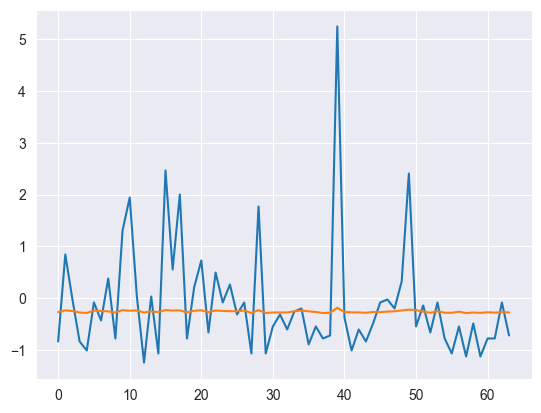

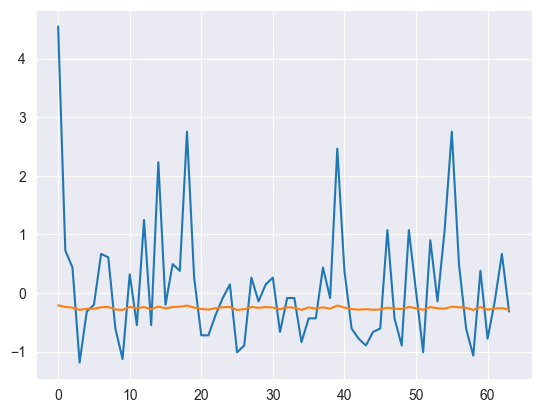

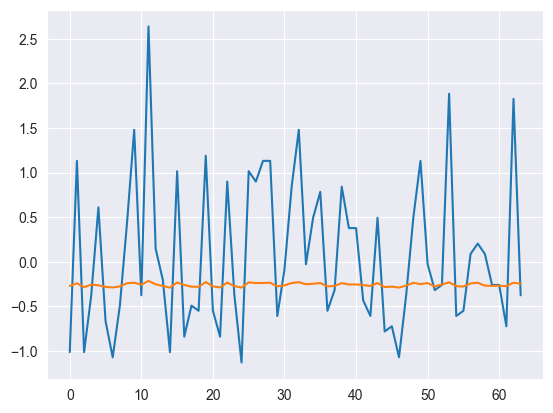

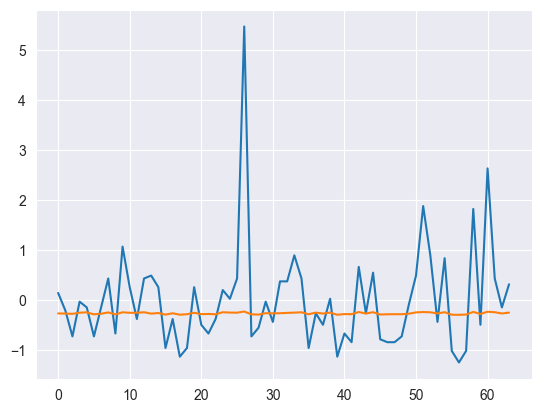

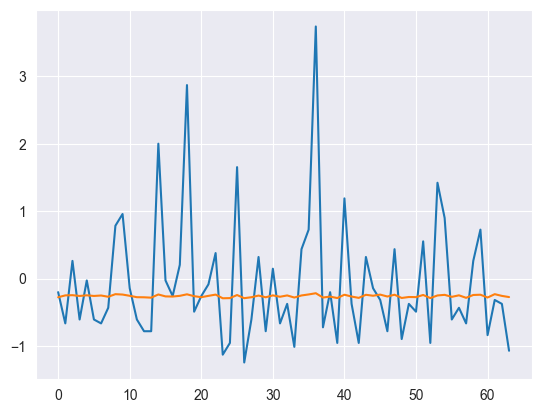

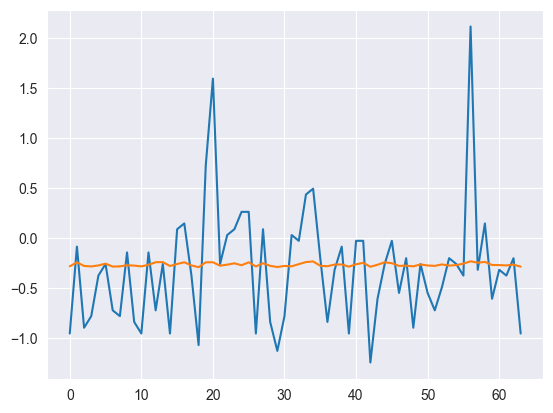

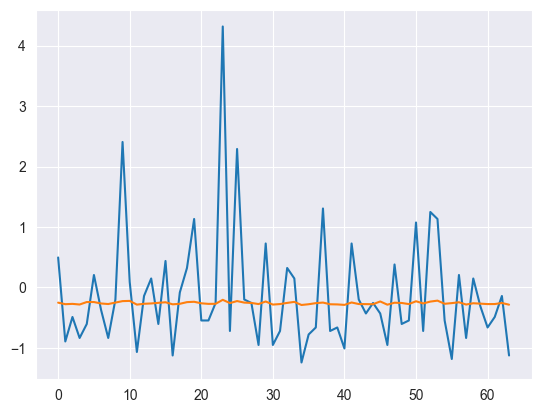

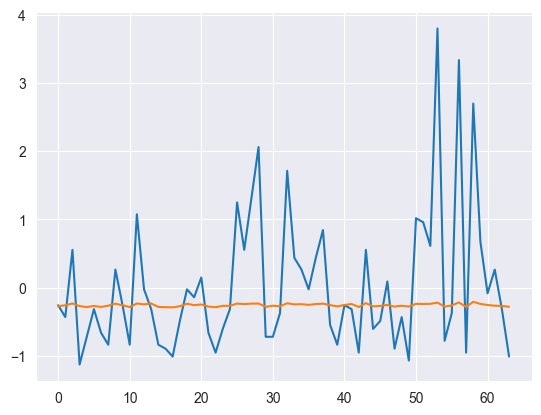

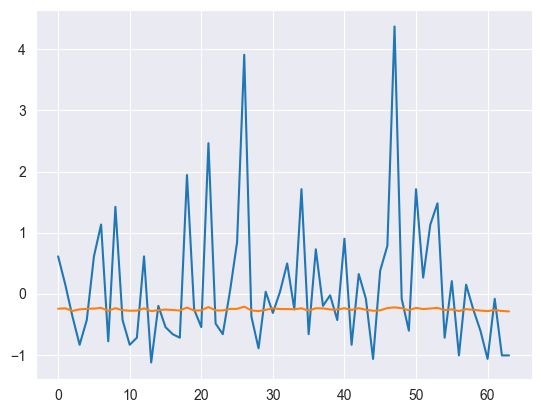

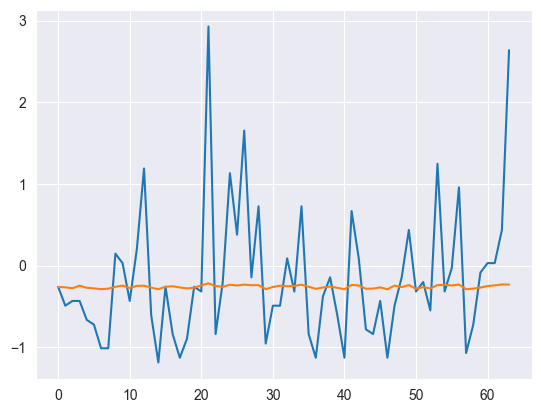

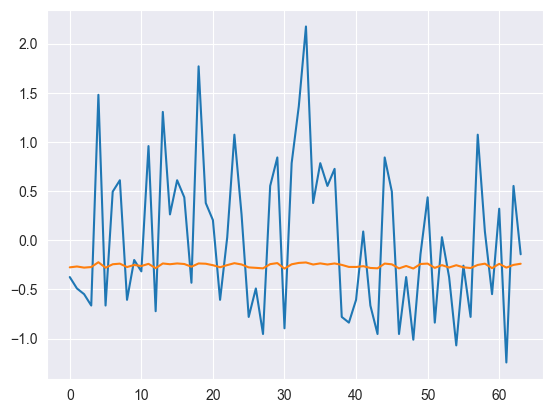

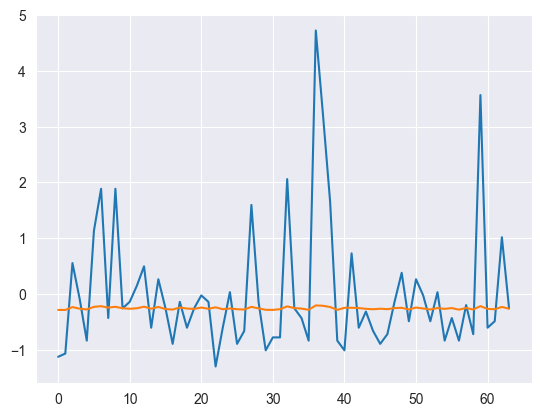

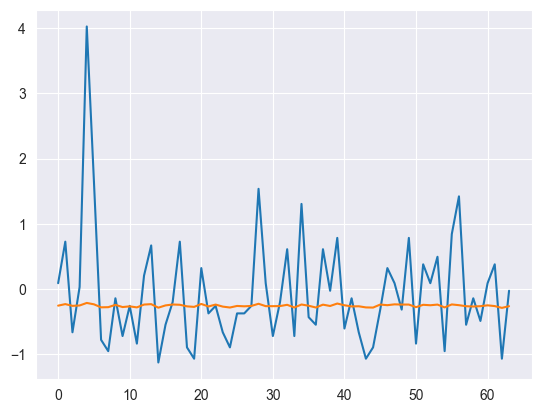

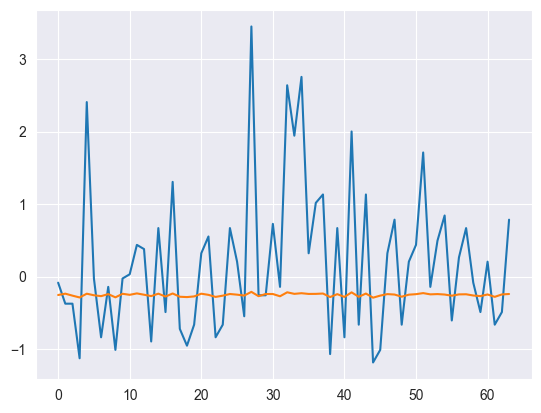

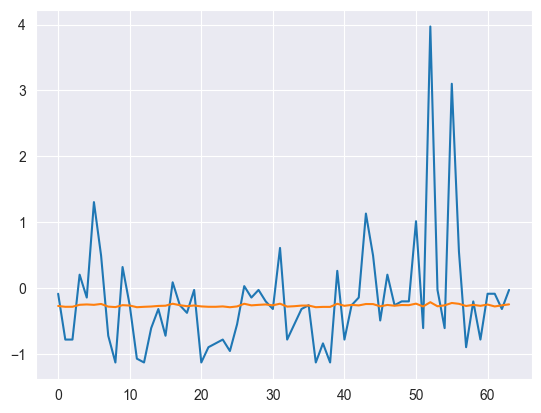

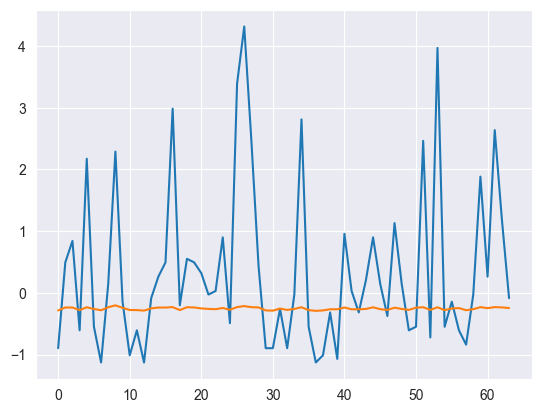

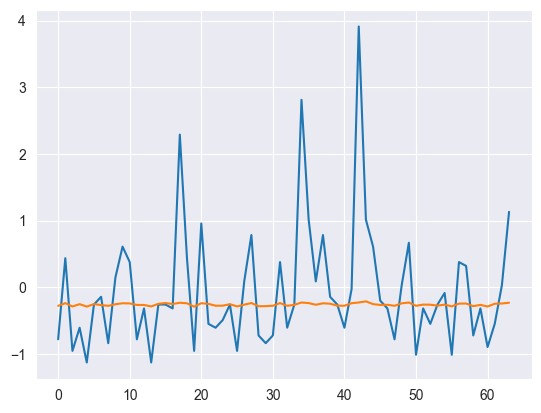

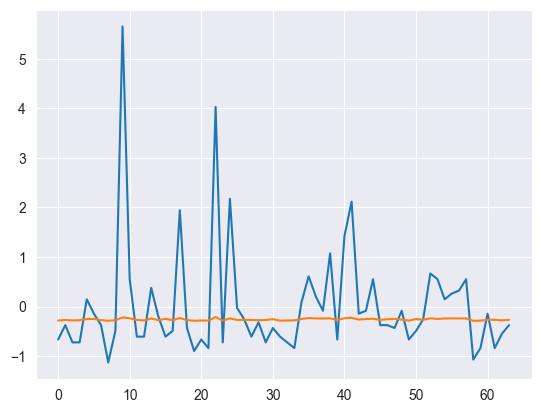

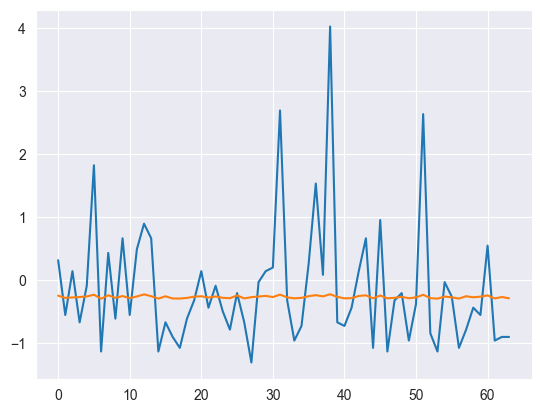

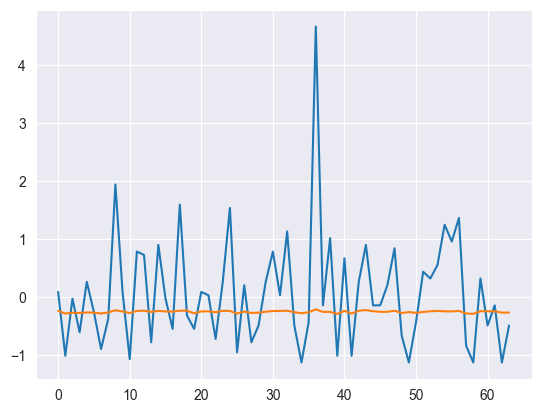

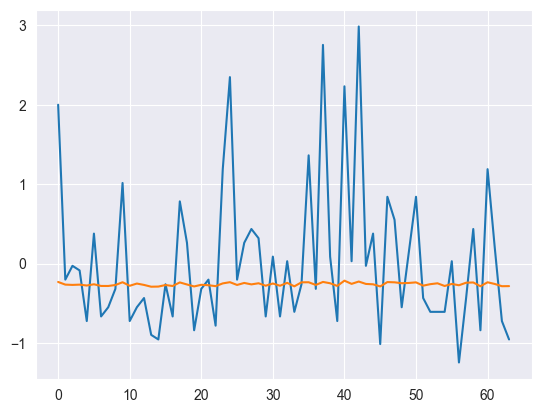

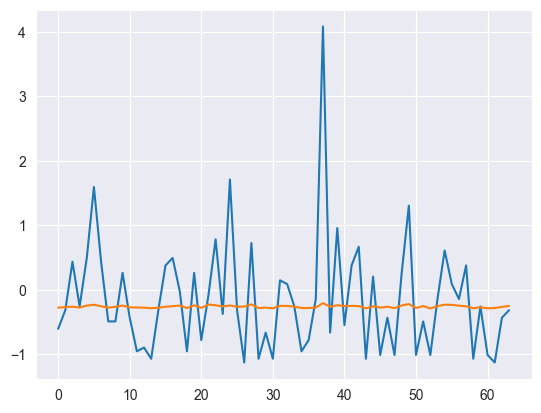

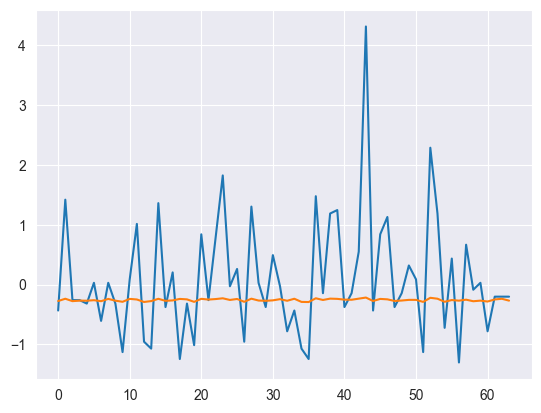

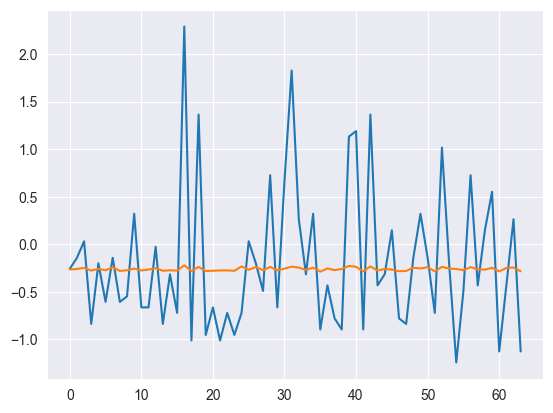

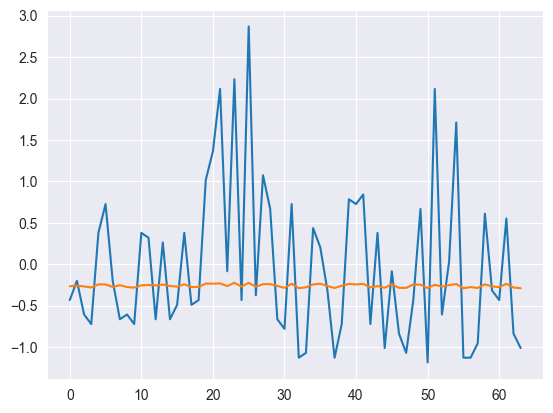

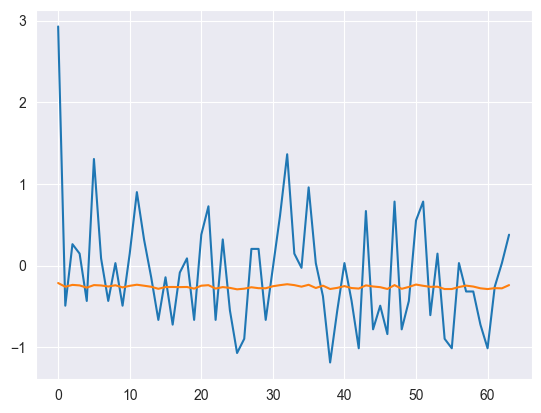

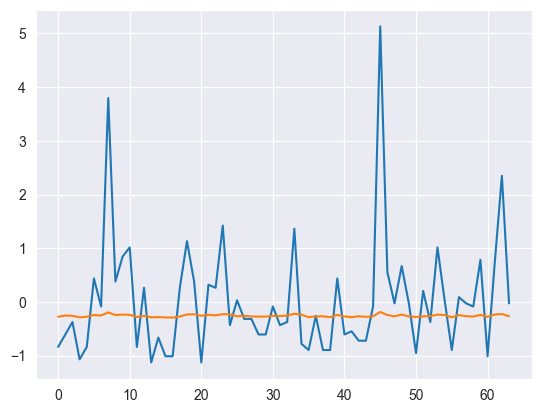

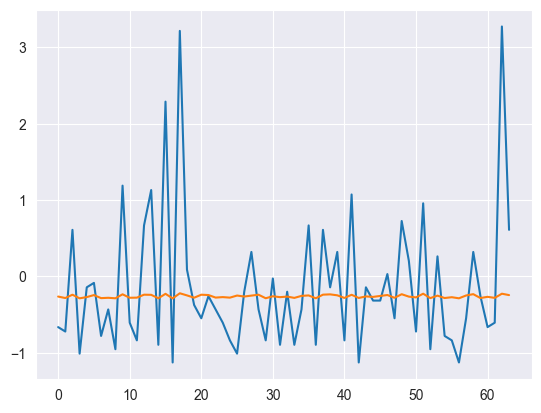

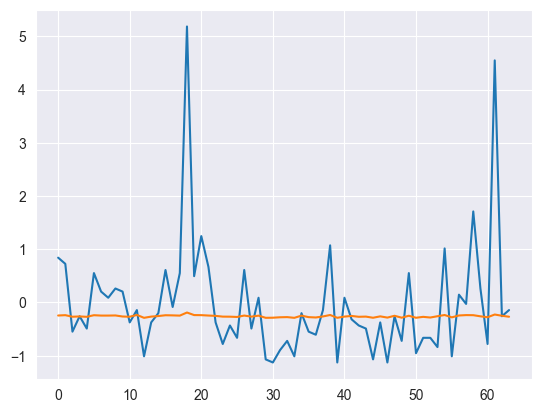

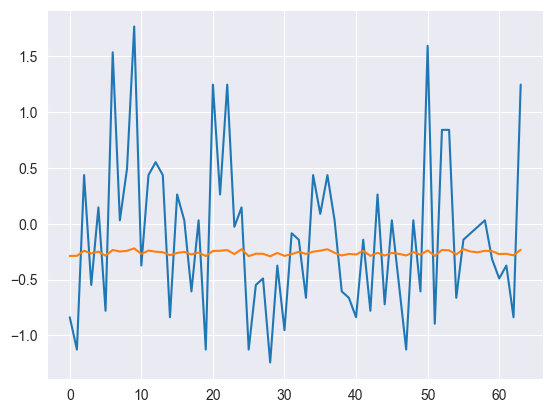

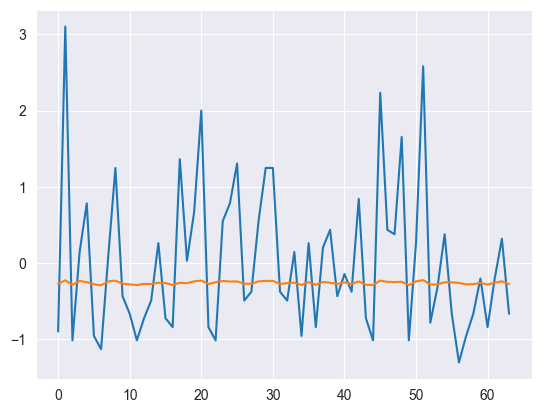

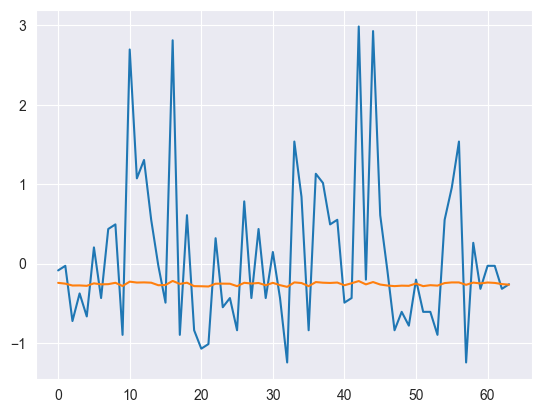

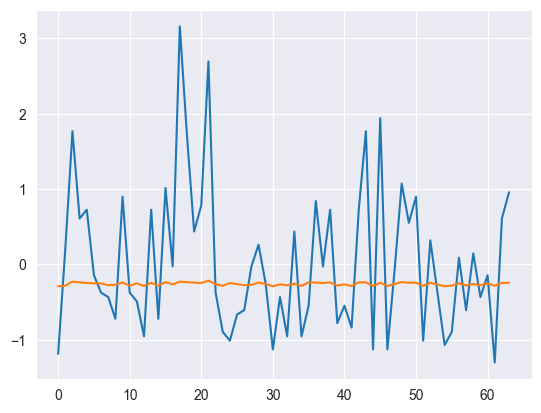

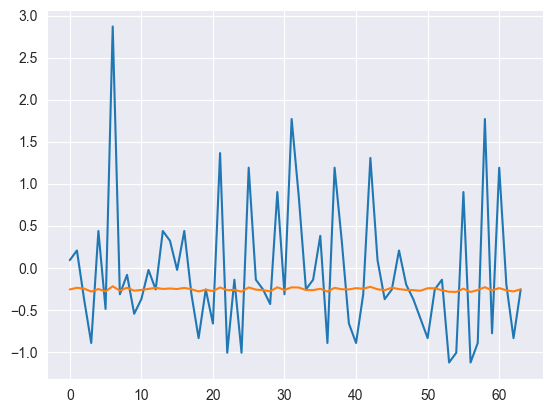

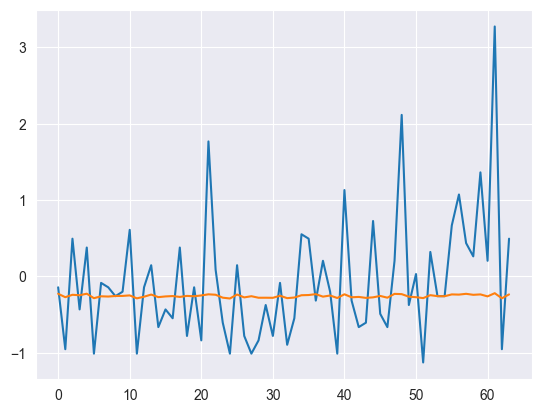

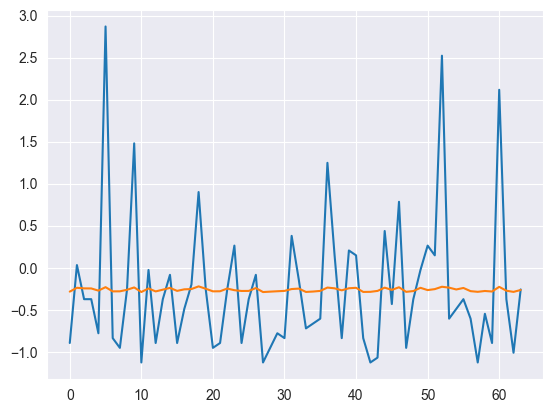

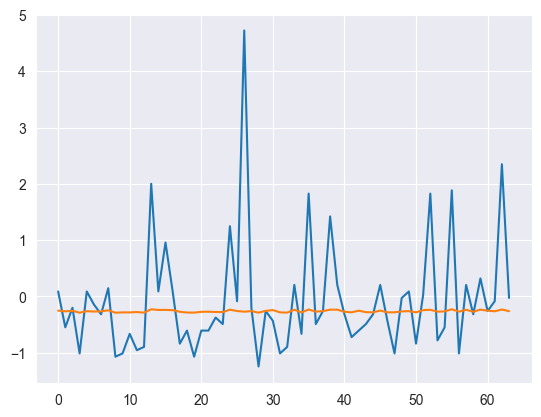

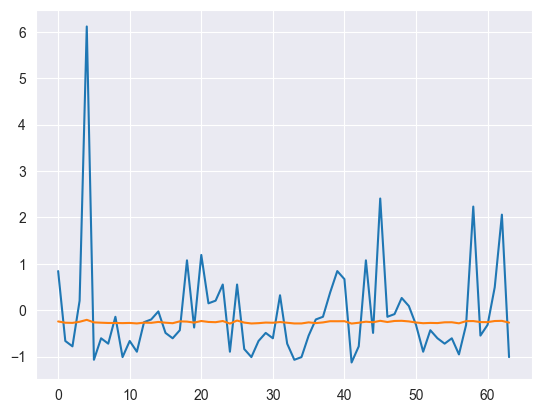

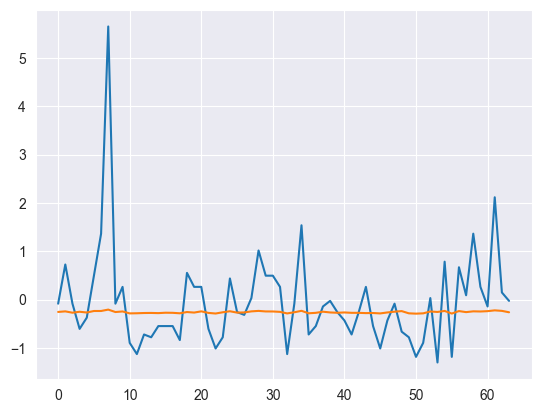

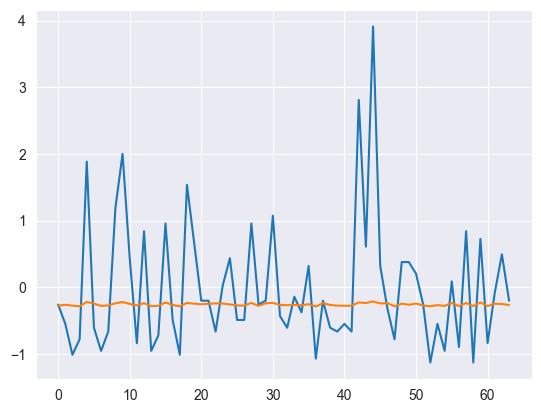

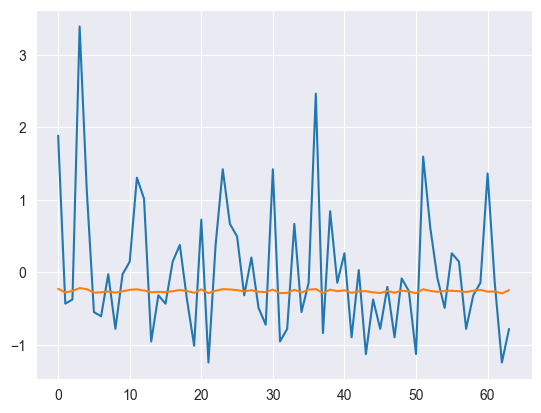

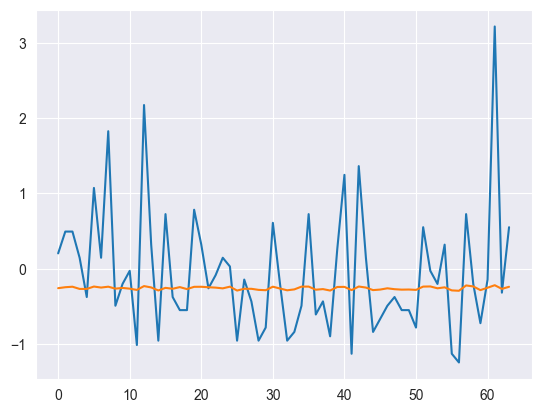

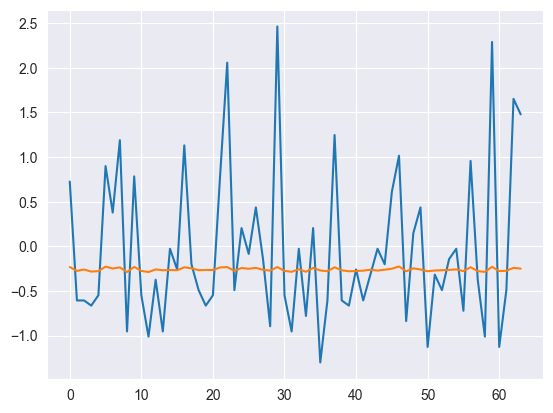

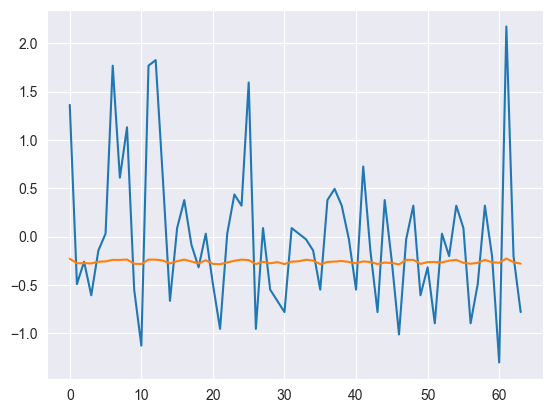

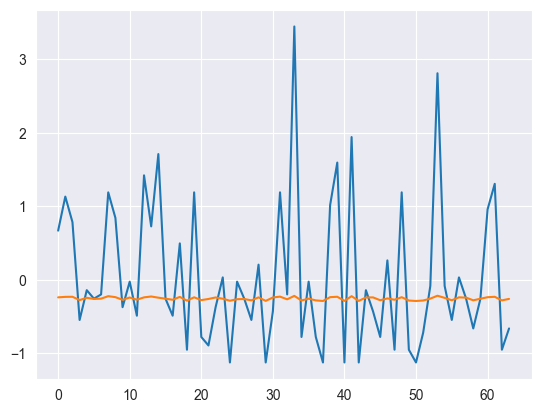

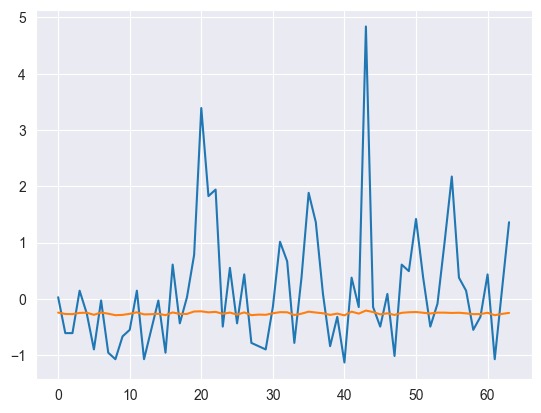

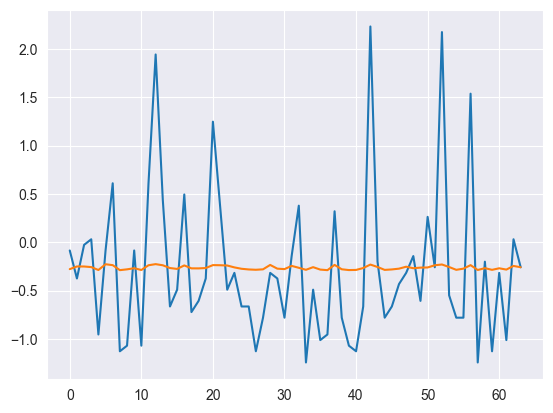

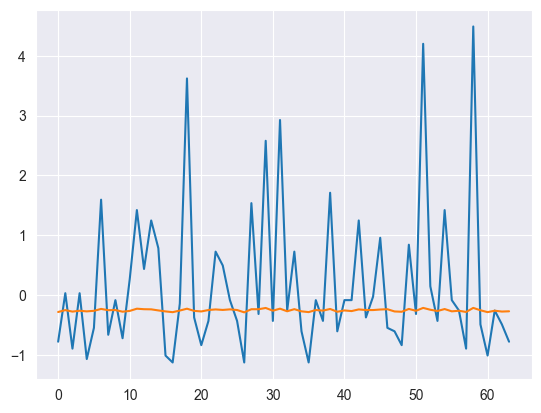

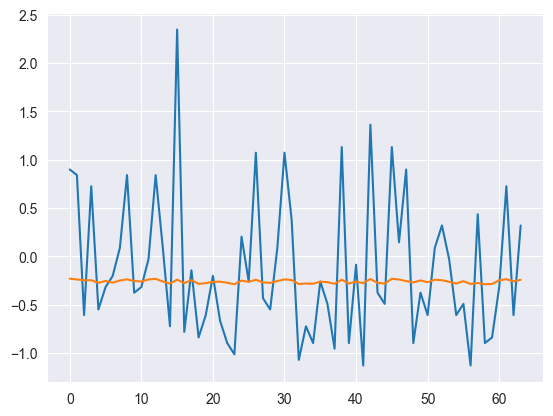

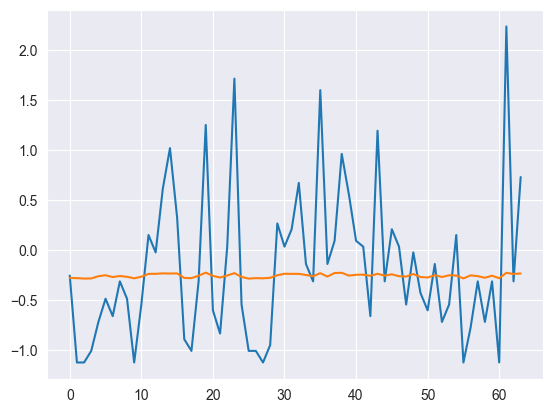

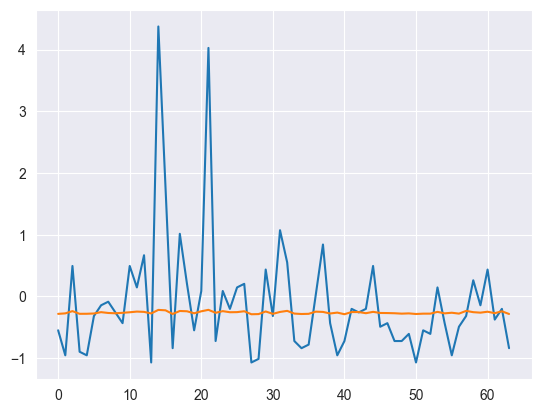

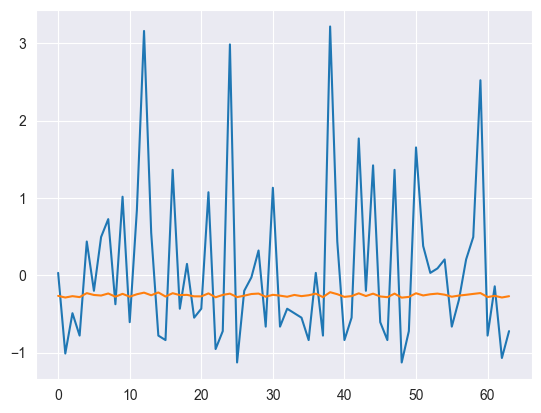

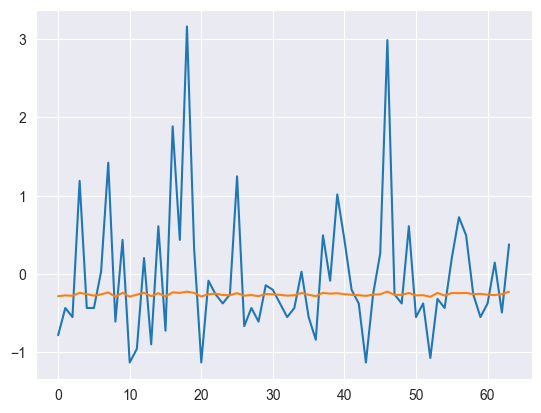

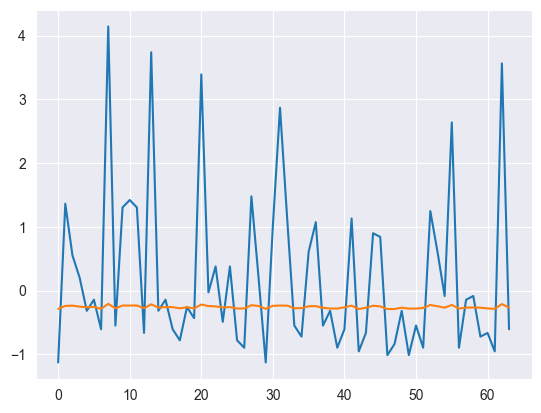

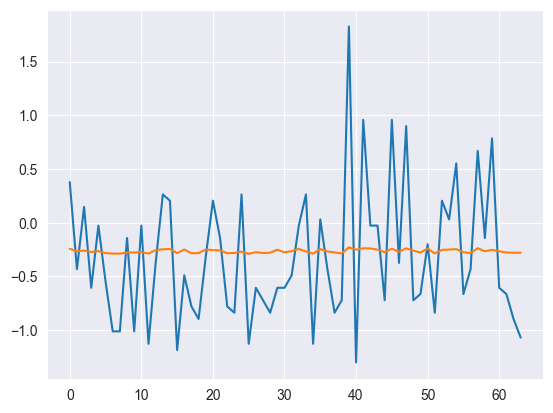

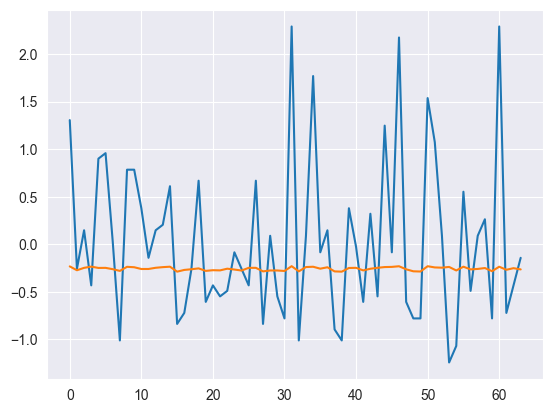

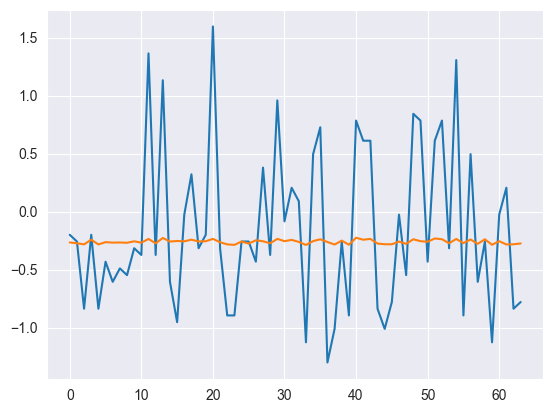

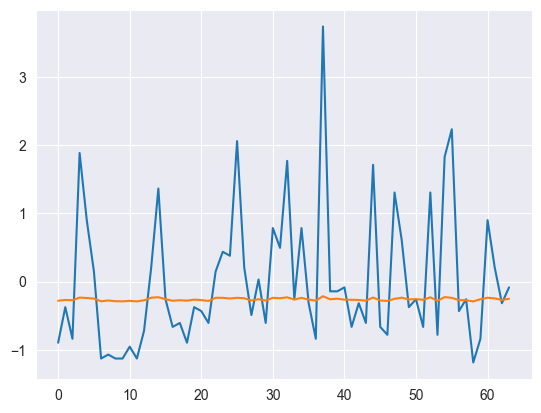

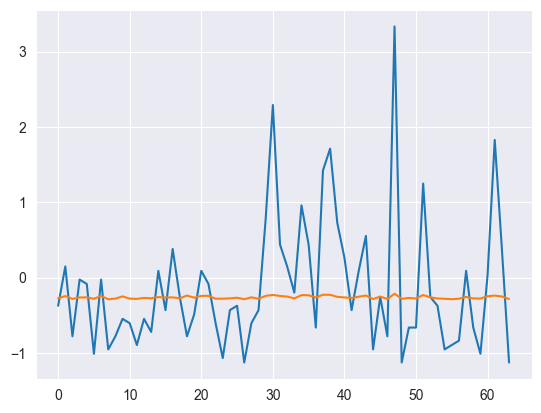

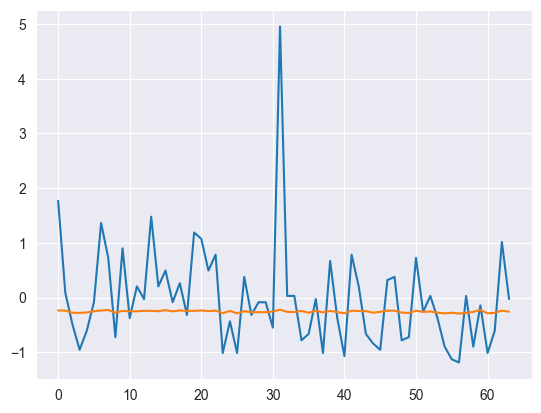

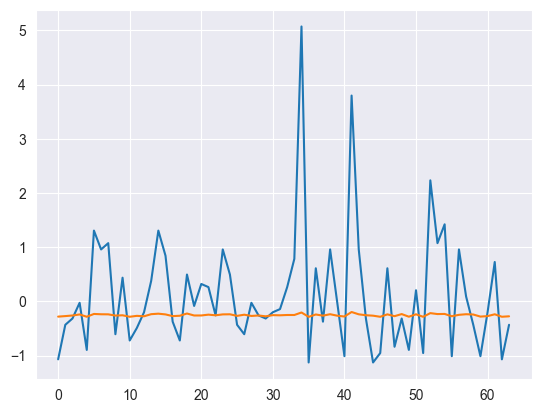

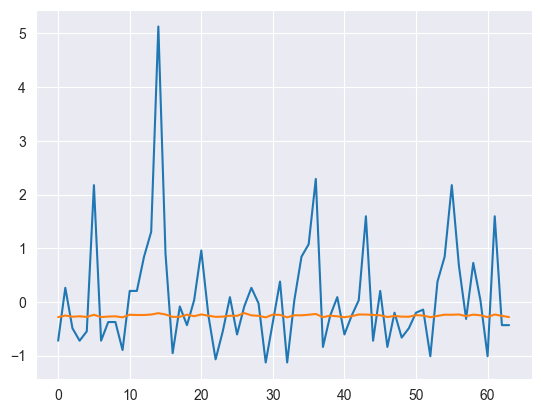

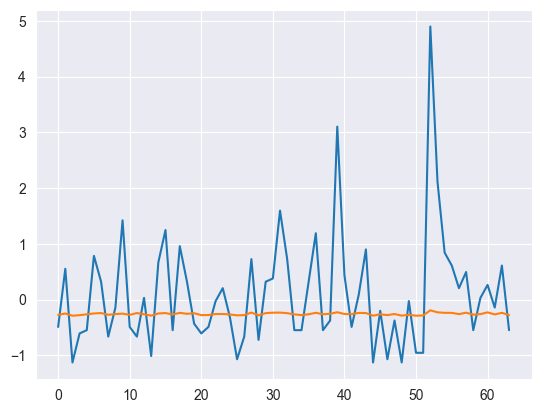

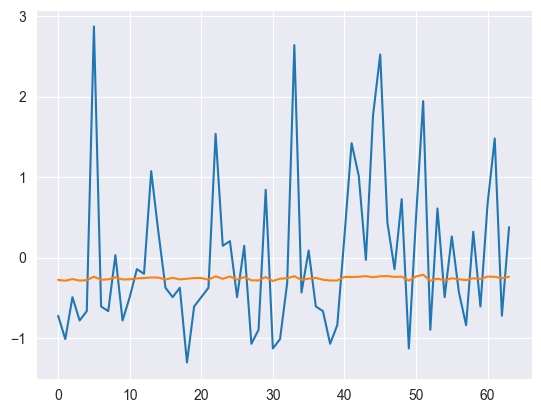

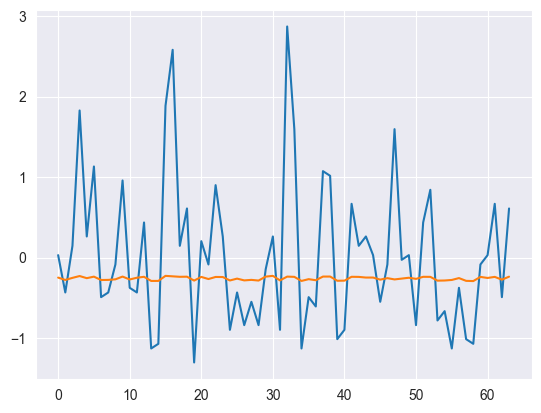

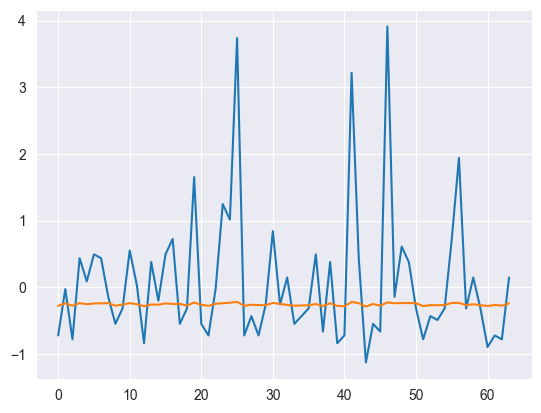

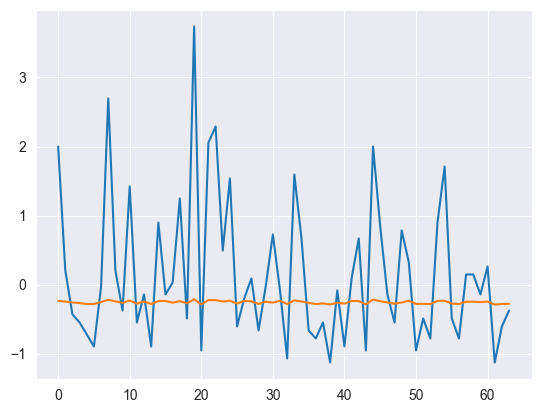

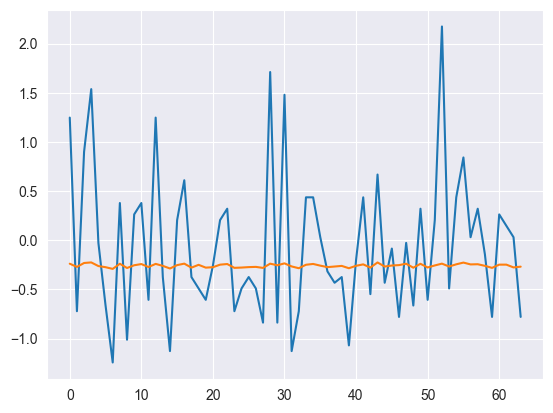

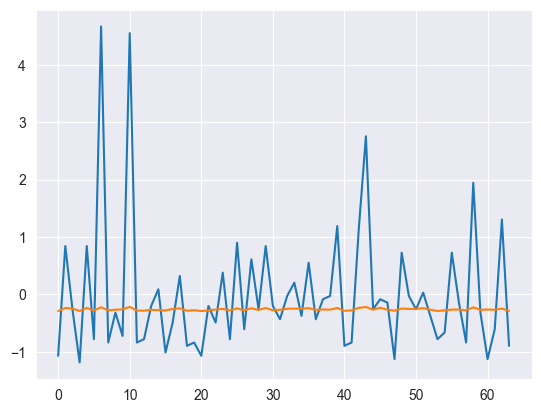

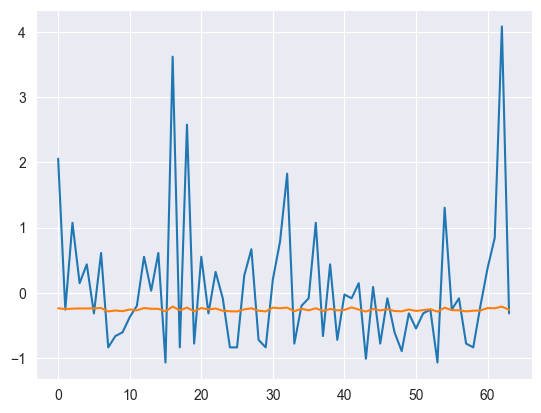

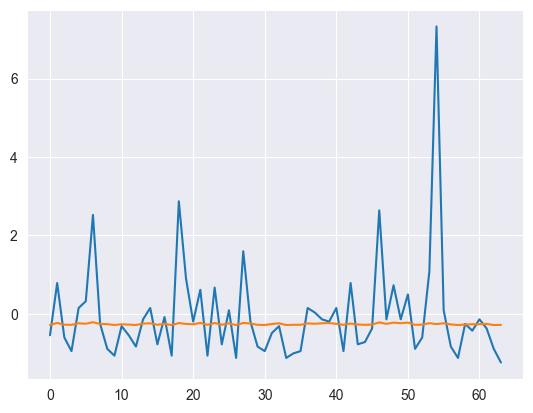

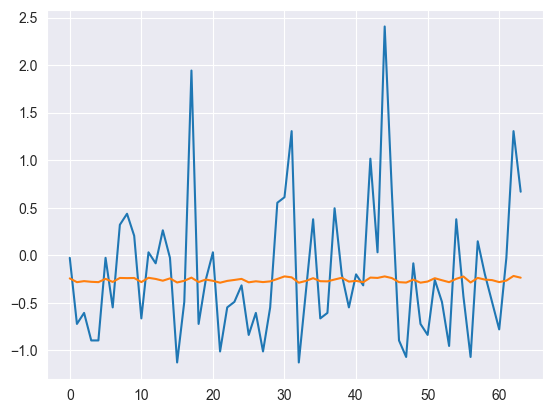

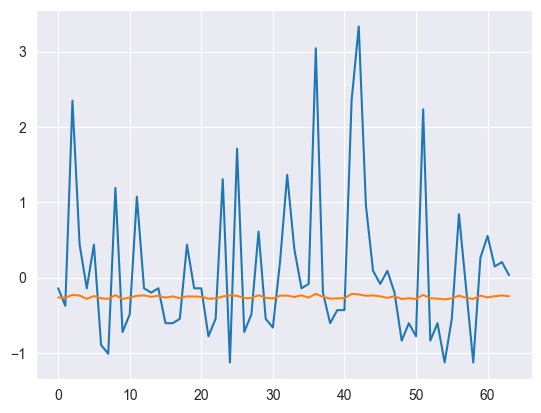

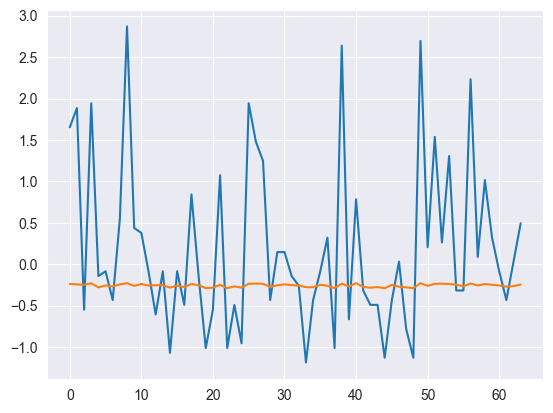

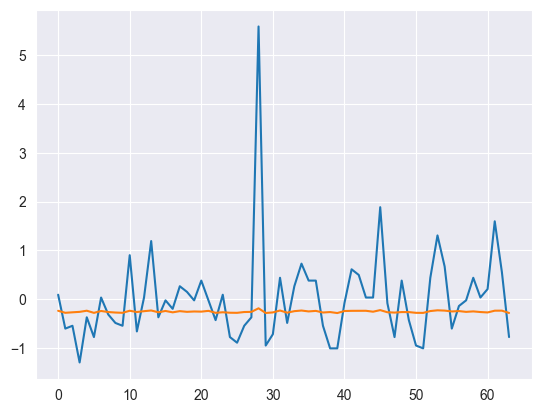

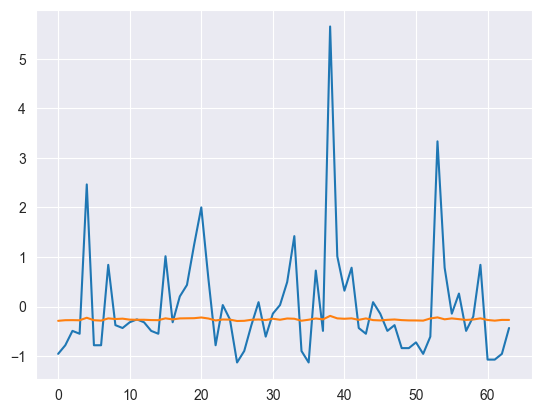

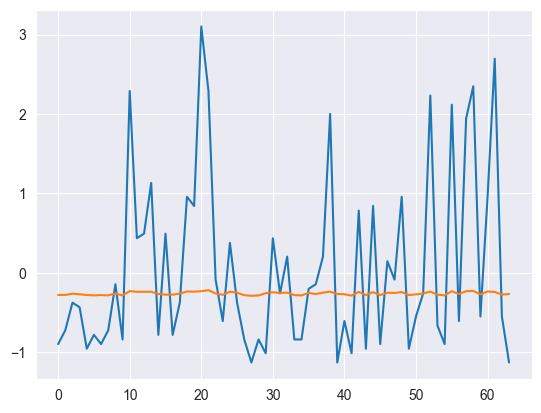

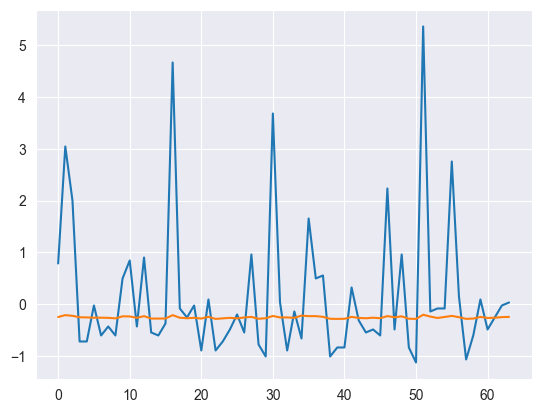

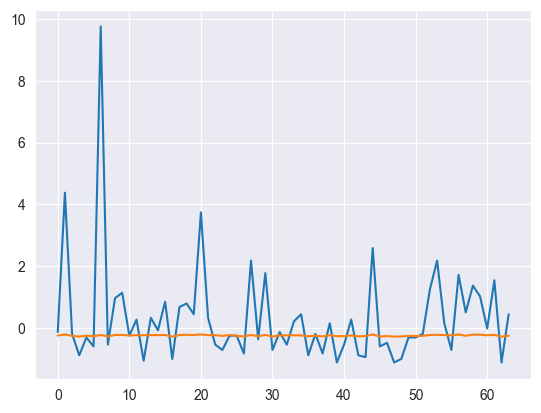

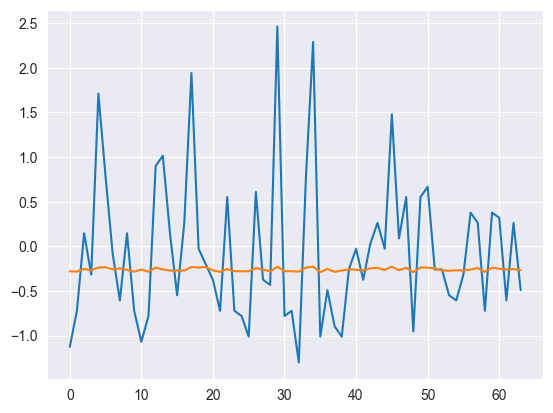

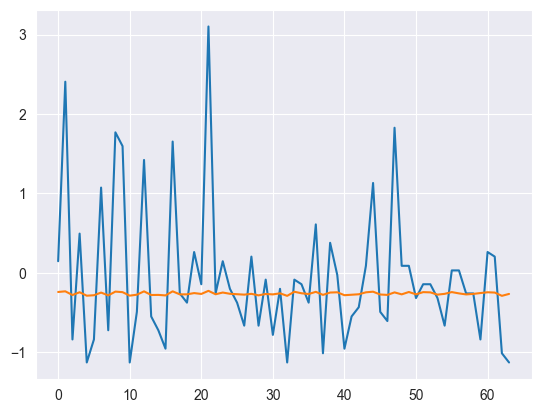

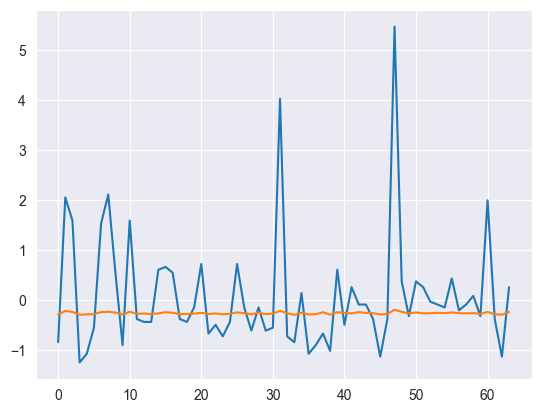

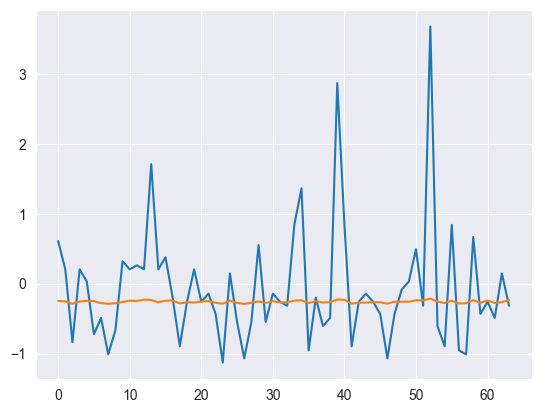

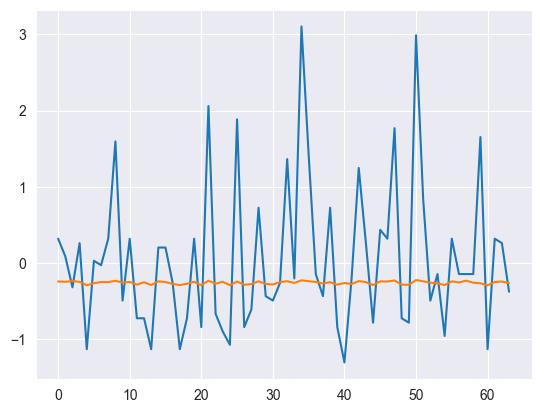

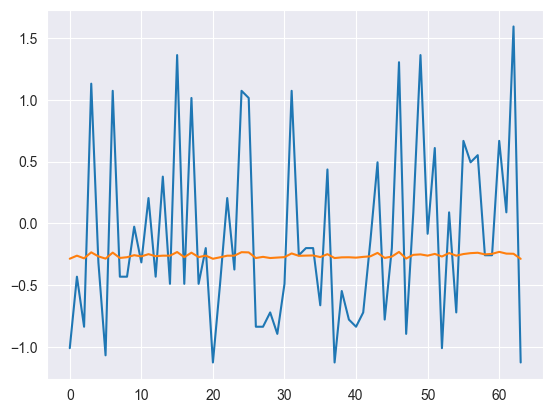

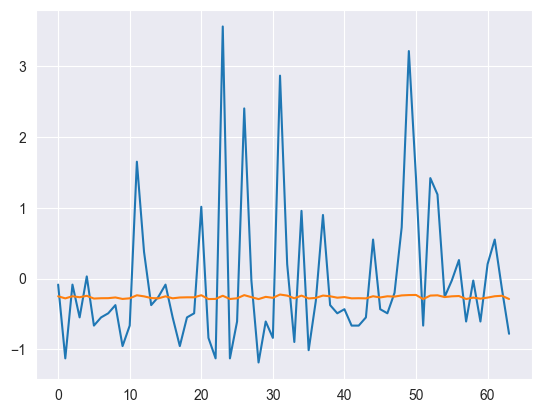

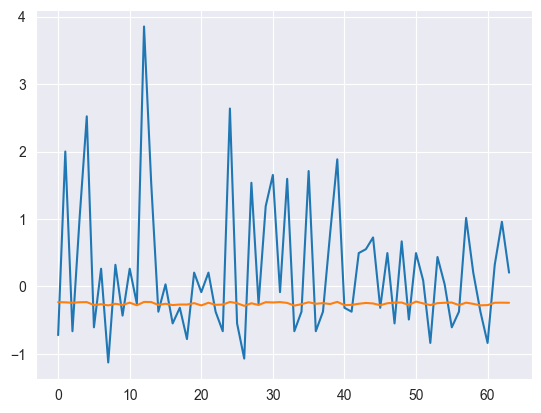

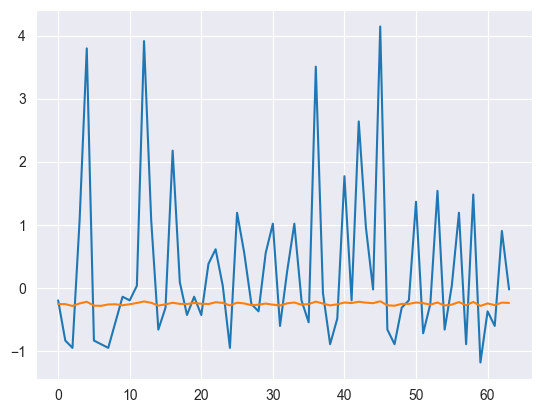

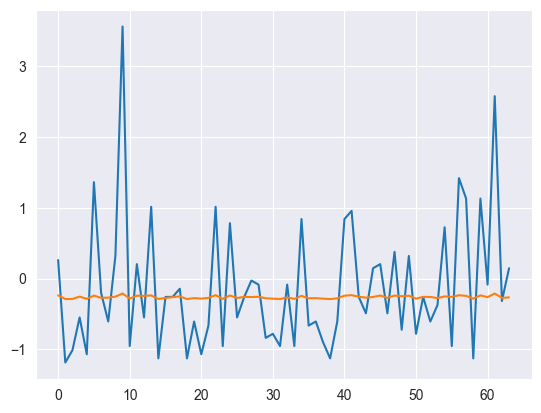

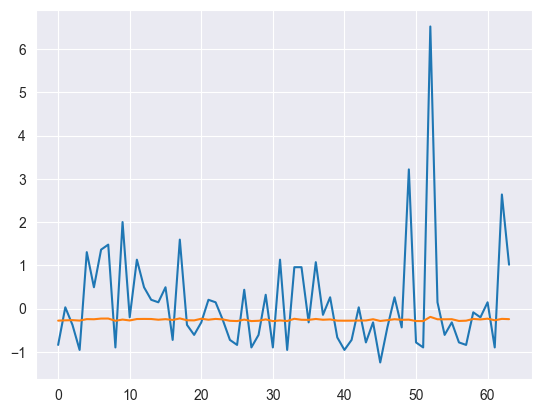

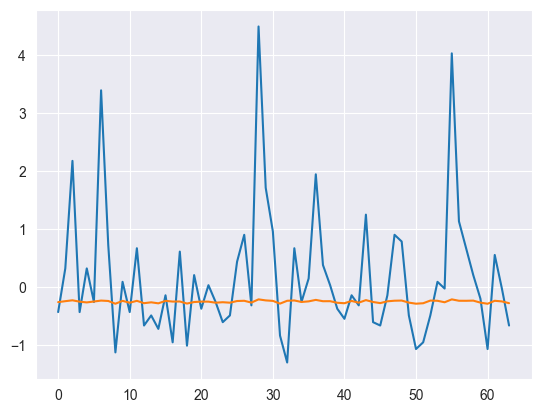

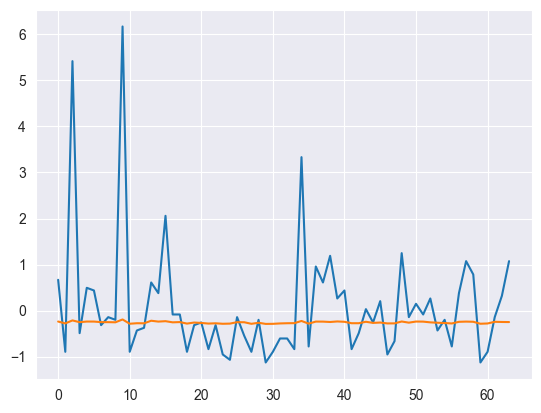

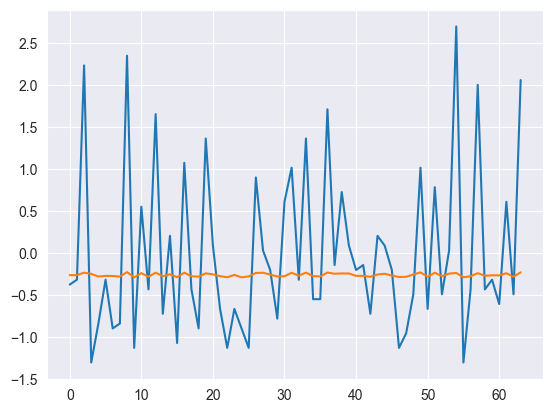

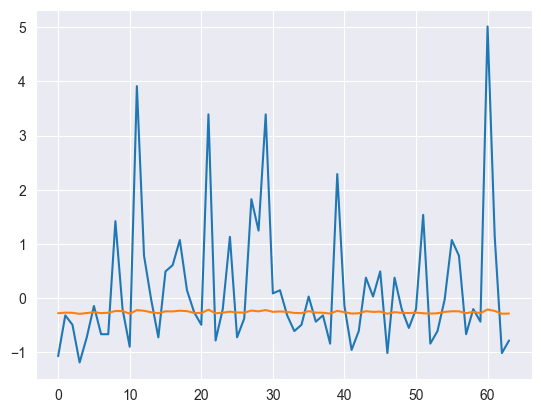

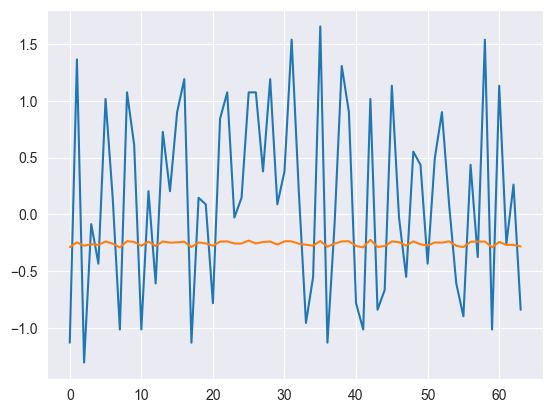

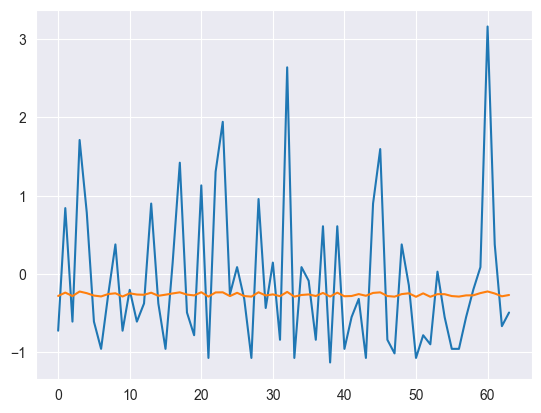

KeyboardInterrupt: 

In [30]:
model.eval()
with torch.no_grad():
    for data in train:
        out = model(data)
        plt.plot([i[0] for i in data[0].y])
        plt.plot(out.numpy()[:, 0])
        plt.show()

In [12]:
print(graphs[0])

[Data(edge_index=[2, 518], feature=[25, 3], num_nodes=25, x=[25, 3], y=[25]), Data(edge_index=[2, 518], feature=[25, 3], num_nodes=25, x=[25, 3], y=[25]), Data(edge_index=[2, 518], feature=[25, 3], num_nodes=25, x=[25, 3], y=[25]), Data(edge_index=[2, 518], feature=[25, 3], num_nodes=25, x=[25, 3], y=[25]), Data(edge_index=[2, 518], feature=[25, 3], num_nodes=25, x=[25, 3], y=[25]), Data(edge_index=[2, 518], feature=[25, 3], num_nodes=25, x=[25, 3], y=[25]), Data(edge_index=[2, 518], feature=[25, 3], num_nodes=25, x=[25, 3], y=[25]), Data(edge_index=[2, 518], feature=[25, 3], num_nodes=25, x=[25, 3], y=[25])]
